# Question 1.	Perform pre-processing on the full dataset here: https://www.kaggle.com/sohier/calcofi 

In [1]:
# import necessary modules

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#create dataframes from the csv files
cast_df = pd.read_csv('./cast.csv')
bottle_df = pd.read_csv('./bottle.csv')

In [2]:
#get more information about the cast df
cast_df.head()

,Cst_Cnt,Cruise_ID,Cruise,Cruz_Sta,DbSta_ID,Cast_ID,Sta_ID,Quarter,Sta_Code,Distance,...,Wave_Prd,Wind_Dir,Wind_Spd,Barometer,Dry_T,Wet_T,Wea,Cloud_Typ,Cloud_Amt,Visibility
0,1,1949-03-01-C-31CR,194903,19490305400560,5400560,19-4903CR-HY-060-0930-05400560,054.0 056.0,1,NST,NaN,...,NaN,23.0,18.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
1,2,1949-03-01-C-31CR,194903,19490305200750,5200750,19-4903CR-HY-060-2112-05200750,052.0 075.0,1,NST,NaN,...,NaN,16.0,5.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN
2,3,1949-03-01-C-31CR,194903,19490305100850,5100850,19-4903CR-HY-061-0354-05100850,051.0 085.0,1,NST,NaN,...,NaN,23.0,5.0,NaN,NaN,NaN,6.0,NaN,NaN,NaN
3,4,1949-03-01-C-31CR,194903,19490305000950,5000950,19-4903CR-HY-061-1042-05000950,050.0 095.0,1,NST,NaN,...,NaN,18.0,8.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
4,5,1949-03-01-C-31CR,194903,19490305001040,5001040,19-4903CR-HY-061-1706-05001040,050.0 104.0,1,NST,NaN,...,NaN,27.0,13.0,NaN,NaN,NaN,7.0,NaN,NaN,NaN


In [3]:
#Look at the statistical distribution of each column of the dataset
cast_df.describe()

,Cst_Cnt,Cruise,Cruz_Sta,DbSta_ID,Quarter,Distance,Year,Month,Julian_Date,Julian_Day,...,Wave_Prd,Wind_Dir,Wind_Spd,Barometer,Dry_T,Wet_T,Wea,Cloud_Typ,Cloud_Amt,Visibility
count,34404.000000,34404.000000,3.440400e+04,3.440400e+04,34404.000000,19714.000000,34404.00000,34404.000000,34404.000000,34404.000000,...,11634.000000,32928.000000,32725.000000,19063.000000,19071.000000,18989.000000,26807.000000,9920.000000,11882.000000,9507.000000
mean,17202.500000,197406.030781,1.974061e+13,9.330342e+06,2.366556,-116.135017,1974.00218,5.835397,27017.612313,161.366236,...,6.440863,27.067602,11.135951,1016.243702,16.261989,14.414635,1.324729,5.636895,4.995624,6.803092
std,9931.723667,1974.562207,1.974557e+11,2.217993e+06,1.091894,117.282768,19.74668,3.326775,6900.075983,100.761217,...,2.295422,9.456406,6.823464,8.818816,2.728030,2.630224,1.162603,2.173354,3.106067,1.534078
min,1.000000,194903.000000,1.949030e+13,1.016800e+05,1.000000,-1920.150000,1949.00000,1.000000,17957.000000,2.000000,...,0.000000,0.000000,0.000000,101.400000,1.700000,1.800000,0.000000,0.000000,0.000000,0.000000
25%,8601.750000,195701.000000,1.957011e+13,8.100430e+06,1.000000,-169.801500,1957.00000,3.000000,20832.750000,75.000000,...,5.000000,26.000000,6.000000,1013.700000,14.400000,12.600000,1.000000,6.000000,2.000000,6.000000
50%,17202.500000,196912.000000,1.969121e+13,9.000800e+06,2.000000,-83.570000,1969.00000,6.000000,25532.000000,157.000000,...,6.000000,31.000000,10.000000,1016.300000,16.100000,14.200000,1.000000,6.000000,6.000000,7.000000
75%,25803.250000,198809.000000,1.988091e+13,1.067032e+07,3.000000,-29.470000,1988.00000,9.000000,32400.000000,247.000000,...,8.000000,33.000000,15.000000,1019.100000,17.900000,16.000000,2.000000,7.000000,8.000000,8.000000
max,34404.000000,201611.000000,2.016111e+13,1.767030e+07,4.000000,-0.141000,2016.00000,12.000000,41116.000000,354.000000,...,50.000000,37.000000,71.000000,1112.600000,43.100000,58.000000,9.000000,9.000000,9.000000,9.000000


In [4]:
#Find out total columns, number of null points per column and datatype for each column
cast_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34404 entries, 0 to 34403
Data columns (total 61 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Cst_Cnt      34404 non-null  int64  
 1   Cruise_ID    34404 non-null  object 
 2   Cruise       34404 non-null  int64  
 3   Cruz_Sta     34404 non-null  int64  
 4   DbSta_ID     34404 non-null  int64  
 5   Cast_ID      34404 non-null  object 
 6   Sta_ID       34404 non-null  object 
 7   Quarter      34404 non-null  int64  
 8   Sta_Code     34404 non-null  object 
 9   Distance     19714 non-null  float64
 10  Date         34404 non-null  object 
 11  Year         34404 non-null  int64  
 12  Month        34404 non-null  int64  
 13  Julian_Date  34404 non-null  int64  
 14  Julian_Day   34404 non-null  int64  
 15  Time         34080 non-null  object 
 16  Lat_Dec      34404 non-null  float64
 17  Lat_Deg      34404 non-null  int64  
 18  Lat_Min      34404 non-null  float64
 19  Lat_

In [5]:
#Look for repetitive columns to remove.  For example, Cruise_ID, Cruise, DB_StaID, Cast_ID and Sta_ID can all be removed since the info found in those columns is in Cruz_Sta.
cast_df[['Date', 'Year', 'Month', 'Julian_Date', 'Julian_Day', 'Time']].head()

,Date,Year,Month,Julian_Date,Julian_Day,Time
0,03/01/1949,1949,3,17958,60,09:30:00
1,03/01/1949,1949,3,17958,60,21:12:00
2,03/02/1949,1949,3,17959,61,03:54:00
3,03/02/1949,1949,3,17959,61,10:42:00
4,03/02/1949,1949,3,17959,61,17:06:00


In [6]:
# Date, year, month, and julian_day can all be dropped since they can be found using the julian_date. 
#Now look at location columns to see which ones are repetitve and can be dropped.

cast_df[['Lat_Dec', 'Lat_Deg', 'Lat_Min', 'Lat_Hem', 'Lon_Dec', 'Lon_Deg', 'Lon_Min', 'Lon_Hem']].head()

,Lat_Dec,Lat_Deg,Lat_Min,Lat_Hem,Lon_Dec,Lon_Deg,Lon_Min,Lon_Hem
0,38.833333,38,50.0,N,-124.083333,-124,5.0,W
1,38.583333,38,35.0,N,-125.800000,-125,48.0,W
2,38.475000,38,28.5,N,-126.666666,-126,40.0,W
3,38.333333,38,20.0,N,-127.516666,-127,31.0,W
4,38.233333,38,14.0,N,-128.366666,-128,22.0,W


In [7]:
#Lon_Deg, Lat_Deg,Lat_Hem, and Lon_Hem can also be removed since they are reptitive from Lat_Dec and Lon_Dec
cast_df.iloc[:,24:48].head()

,Rpt_Line,St_Line,Ac_Line,Rpt_Sta,St_Station,Ac_Sta,Bottom_D,Secchi,ForelU,Ship_Name,...,Cruz_Leg,Orig_Sta_ID,Data_Or,Cruz_Num,IntChl,IntC14,Inc_Str,Inc_End,PST_LAN,Civil_T
0,54.0,54.0,53.8,56.0,56.0,55.8,NaN,NaN,NaN,CREST,...,NaN,054 56,NaN,4903,NaN,NaN,NaN,NaN,NaN,NaN
1,52.0,52.0,51.5,75.0,75.0,75.1,NaN,NaN,NaN,CREST,...,NaN,052 75,NaN,4903,NaN,NaN,NaN,NaN,NaN,NaN
2,51.0,51.0,50.3,85.0,85.0,84.7,NaN,NaN,NaN,CREST,...,NaN,051 85,NaN,4903,NaN,NaN,NaN,NaN,NaN,NaN
3,50.0,50.0,49.2,95.0,95.0,94.3,NaN,NaN,NaN,CREST,...,NaN,050 95,NaN,4903,NaN,NaN,NaN,NaN,NaN,NaN
4,50.0,50.0,48.0,104.0,104.0,103.7,NaN,NaN,NaN,CREST,...,NaN,050 104,NaN,4903,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#After looking at columns, remove all columns that are repetitve or not necessary for our analysis and columns with lots of missing data. 
cast_df.drop(cast_df.iloc[:,24:48], axis=1, inplace=True)

In [9]:
cast_df.drop(cast_df.iloc[:, 0:2], axis=1, inplace=True)
cast_df.head()

,Cruise,Cruz_Sta,DbSta_ID,Cast_ID,Sta_ID,Quarter,Sta_Code,Distance,Date,Year,...,Wave_Prd,Wind_Dir,Wind_Spd,Barometer,Dry_T,Wet_T,Wea,Cloud_Typ,Cloud_Amt,Visibility
0,194903,19490305400560,5400560,19-4903CR-HY-060-0930-05400560,054.0 056.0,1,NST,NaN,03/01/1949,1949,...,NaN,23.0,18.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
1,194903,19490305200750,5200750,19-4903CR-HY-060-2112-05200750,052.0 075.0,1,NST,NaN,03/01/1949,1949,...,NaN,16.0,5.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN
2,194903,19490305100850,5100850,19-4903CR-HY-061-0354-05100850,051.0 085.0,1,NST,NaN,03/02/1949,1949,...,NaN,23.0,5.0,NaN,NaN,NaN,6.0,NaN,NaN,NaN
3,194903,19490305000950,5000950,19-4903CR-HY-061-1042-05000950,050.0 095.0,1,NST,NaN,03/02/1949,1949,...,NaN,18.0,8.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
4,194903,19490305001040,5001040,19-4903CR-HY-061-1706-05001040,050.0 104.0,1,NST,NaN,03/02/1949,1949,...,NaN,27.0,13.0,NaN,NaN,NaN,7.0,NaN,NaN,NaN


In [10]:
drop_columns = ['Sta_Code', 'Distance', 'Date', 'Year', 'Month', 'Julian_Day', 'Time', 'Lat_Deg', 'Lat_Min', 'Lat_Hem', 'Lon_Deg', 'Lon_Min', 'Lon_Hem', 'TimeZone']
cast_df.drop(drop_columns, axis=1, inplace=True)
cast_df.head()

,Cruise,Cruz_Sta,DbSta_ID,Cast_ID,Sta_ID,Quarter,Julian_Date,Lat_Dec,Lon_Dec,Wave_Dir,...,Wave_Prd,Wind_Dir,Wind_Spd,Barometer,Dry_T,Wet_T,Wea,Cloud_Typ,Cloud_Amt,Visibility
0,194903,19490305400560,5400560,19-4903CR-HY-060-0930-05400560,054.0 056.0,1,17958,38.833333,-124.083333,NaN,...,NaN,23.0,18.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
1,194903,19490305200750,5200750,19-4903CR-HY-060-2112-05200750,052.0 075.0,1,17958,38.583333,-125.800000,NaN,...,NaN,16.0,5.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN
2,194903,19490305100850,5100850,19-4903CR-HY-061-0354-05100850,051.0 085.0,1,17959,38.475000,-126.666666,NaN,...,NaN,23.0,5.0,NaN,NaN,NaN,6.0,NaN,NaN,NaN
3,194903,19490305000950,5000950,19-4903CR-HY-061-1042-05000950,050.0 095.0,1,17959,38.333333,-127.516666,NaN,...,NaN,18.0,8.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
4,194903,19490305001040,5001040,19-4903CR-HY-061-1706-05001040,050.0 104.0,1,17959,38.233333,-128.366666,NaN,...,NaN,27.0,13.0,NaN,NaN,NaN,7.0,NaN,NaN,NaN


In [11]:
cast_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34404 entries, 0 to 34403
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Cruise       34404 non-null  int64  
 1   Cruz_Sta     34404 non-null  int64  
 2   DbSta_ID     34404 non-null  int64  
 3   Cast_ID      34404 non-null  object 
 4   Sta_ID       34404 non-null  object 
 5   Quarter      34404 non-null  int64  
 6   Julian_Date  34404 non-null  int64  
 7   Lat_Dec      34404 non-null  float64
 8   Lon_Dec      34404 non-null  float64
 9   Wave_Dir     12558 non-null  float64
 10  Wave_Ht      12098 non-null  float64
 11  Wave_Prd     11634 non-null  float64
 12  Wind_Dir     32928 non-null  float64
 13  Wind_Spd     32725 non-null  float64
 14  Barometer    19063 non-null  float64
 15  Dry_T        19071 non-null  float64
 16  Wet_T        18989 non-null  float64
 17  Wea          26807 non-null  float64
 18  Cloud_Typ    9920 non-null   float64
 19  Clou

In [12]:
#Drop all rows with missing values
#new_df = (cast_df.drop([cast_df.isnull()==False], axis=0))
cast_df.dropna(axis=1, thresh=10000, inplace=True)

#drop rows with missing values
cast_df.dropna(axis=0, inplace=True)

In [13]:
cast_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9788 entries, 13971 to 34403
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Cruise       9788 non-null   int64  
 1   Cruz_Sta     9788 non-null   int64  
 2   DbSta_ID     9788 non-null   int64  
 3   Cast_ID      9788 non-null   object 
 4   Sta_ID       9788 non-null   object 
 5   Quarter      9788 non-null   int64  
 6   Julian_Date  9788 non-null   int64  
 7   Lat_Dec      9788 non-null   float64
 8   Lon_Dec      9788 non-null   float64
 9   Wave_Dir     9788 non-null   float64
 10  Wave_Ht      9788 non-null   float64
 11  Wave_Prd     9788 non-null   float64
 12  Wind_Dir     9788 non-null   float64
 13  Wind_Spd     9788 non-null   float64
 14  Barometer    9788 non-null   float64
 15  Dry_T        9788 non-null   float64
 16  Wet_T        9788 non-null   float64
 17  Wea          9788 non-null   float64
 18  Cloud_Amt    9788 non-null   float64
dtypes

In [14]:
#Look at the bottle dataframe using describe, info, and head
bottle_df.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
bottle_df.describe()

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,...,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1
count,864863.000000,864863.000000,864863.000000,853900.000000,817509.000000,696201.000000,812174.000000,661274.000000,661268.000000,118667.000000,...,225276.000000,225275.000000,864863.000000,122006.000000,1999.000000,224.000000,2084.000000,234.000000,10.000000,84.000000
mean,17138.790958,432432.000000,226.831951,10.799677,33.840350,3.392468,25.819394,57.103779,148.808694,10.497426,...,0.450225,0.198599,228.395694,162.071521,2153.239714,2168.148330,2256.055845,2278.858803,7.948570,7.910983
std,10240.949817,249664.587267,316.050259,4.243825,0.461843,2.073256,1.167787,37.094137,90.187533,6.189688,...,1.208566,0.376539,319.456731,85.722796,112.995202,154.852332,34.844435,58.496495,0.021216,0.077666
min,1.000000,1.000000,0.000000,1.440000,28.431000,-0.010000,20.934000,-0.100000,-0.434900,0.000000,...,-0.010000,-3.890000,0.000000,0.000000,1948.850000,1969.440000,2181.570000,2198.150000,7.923100,7.618300
25%,8269.000000,216216.500000,46.000000,7.680000,33.488000,1.360000,24.965000,21.100000,60.915470,5.000000,...,0.050000,0.050000,46.000000,200.000000,2028.330000,2008.977500,2230.322500,2229.062500,7.931475,7.898675
50%,16848.000000,432432.000000,125.000000,10.060000,33.863000,3.440000,25.996000,54.400000,151.064150,10.000000,...,0.160000,0.110000,126.000000,206.000000,2170.640000,2265.885000,2244.325000,2247.505000,7.946650,7.928850
75%,26557.000000,648647.500000,300.000000,13.880000,34.196900,5.500000,26.646000,97.600000,240.379600,16.000000,...,0.390000,0.230000,302.000000,214.000000,2253.810000,2315.525000,2278.505000,2316.452500,7.963300,7.955100
max,34404.000000,864863.000000,5351.000000,31.140000,37.034000,11.130000,250.784000,214.100000,485.701800,25.000000,...,66.110000,65.300000,5458.000000,424.000000,2367.800000,2364.420000,2434.900000,2437.000000,7.988300,8.047700


In [16]:
bottle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 74 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Cst_Cnt              864863 non-null  int64  
 1   Btl_Cnt              864863 non-null  int64  
 2   Sta_ID               864863 non-null  object 
 3   Depth_ID             864863 non-null  object 
 4   Depthm               864863 non-null  int64  
 5   T_degC               853900 non-null  float64
 6   Salnty               817509 non-null  float64
 7   O2ml_L               696201 non-null  float64
 8   STheta               812174 non-null  float64
 9   O2Sat                661274 non-null  float64
 10  Oxy_µmol/Kg          661268 non-null  float64
 11  BtlNum               118667 non-null  float64
 12  RecInd               864863 non-null  int64  
 13  T_prec               853900 non-null  float64
 14  T_qual               23127 non-null   float64
 15  S_prec           

In [17]:
#Drop columns with lots of missing values (67-73)
bottle_df.drop(bottle_df.iloc[:, 67:74], axis=1, inplace=True)

In [18]:
bottle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 67 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Cst_Cnt      864863 non-null  int64  
 1   Btl_Cnt      864863 non-null  int64  
 2   Sta_ID       864863 non-null  object 
 3   Depth_ID     864863 non-null  object 
 4   Depthm       864863 non-null  int64  
 5   T_degC       853900 non-null  float64
 6   Salnty       817509 non-null  float64
 7   O2ml_L       696201 non-null  float64
 8   STheta       812174 non-null  float64
 9   O2Sat        661274 non-null  float64
 10  Oxy_µmol/Kg  661268 non-null  float64
 11  BtlNum       118667 non-null  float64
 12  RecInd       864863 non-null  int64  
 13  T_prec       853900 non-null  float64
 14  T_qual       23127 non-null   float64
 15  S_prec       817509 non-null  float64
 16  S_qual       74914 non-null   float64
 17  P_qual       673755 non-null  float64
 18  O_qual       184676 non-

In [19]:
#look at object columns (Sta_ID, Depth_ID, IncTim)
bottle_df[['Sta_ID', 'Depth_ID', 'IncTim']].head()

,Sta_ID,Depth_ID,IncTim
0,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,NaN
1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,NaN
2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,NaN
3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,NaN
4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,NaN


In [20]:
#Remove object columns since they are not necessary for our research
bottle_df.drop(['Cst_Cnt', 'Btl_Cnt', 'Sta_ID', 'Depth_ID', 'IncTim'], axis=1, inplace=True)

In [21]:
bottle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 62 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Depthm       864863 non-null  int64  
 1   T_degC       853900 non-null  float64
 2   Salnty       817509 non-null  float64
 3   O2ml_L       696201 non-null  float64
 4   STheta       812174 non-null  float64
 5   O2Sat        661274 non-null  float64
 6   Oxy_µmol/Kg  661268 non-null  float64
 7   BtlNum       118667 non-null  float64
 8   RecInd       864863 non-null  int64  
 9   T_prec       853900 non-null  float64
 10  T_qual       23127 non-null   float64
 11  S_prec       817509 non-null  float64
 12  S_qual       74914 non-null   float64
 13  P_qual       673755 non-null  float64
 14  O_qual       184676 non-null  float64
 15  SThtaq       65823 non-null   float64
 16  O2Satq       217797 non-null  float64
 17  ChlorA       225272 non-null  float64
 18  Chlqua       639166 non-

In [22]:
#Drop columns with lots of missing values
bottle_df.dropna(axis=1, thresh=600000, inplace=True)

In [23]:
bottle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 28 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Depthm       864863 non-null  int64  
 1   T_degC       853900 non-null  float64
 2   Salnty       817509 non-null  float64
 3   O2ml_L       696201 non-null  float64
 4   STheta       812174 non-null  float64
 5   O2Sat        661274 non-null  float64
 6   Oxy_µmol/Kg  661268 non-null  float64
 7   RecInd       864863 non-null  int64  
 8   T_prec       853900 non-null  float64
 9   S_prec       817509 non-null  float64
 10  P_qual       673755 non-null  float64
 11  Chlqua       639166 non-null  float64
 12  Phaqua       639170 non-null  float64
 13  NH3q         808299 non-null  float64
 14  C14A1q       848605 non-null  float64
 15  C14A2q       848623 non-null  float64
 16  DarkAq       840440 non-null  float64
 17  MeanAq       840439 non-null  float64
 18  R_Depth      864863 non-

In [24]:
#Drop columns that give NA during correlation
bottle_df.drop(bottle_df.iloc[:, 13:20], axis=1, inplace=True)

In [25]:
bottle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 21 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Depthm       864863 non-null  int64  
 1   T_degC       853900 non-null  float64
 2   Salnty       817509 non-null  float64
 3   O2ml_L       696201 non-null  float64
 4   STheta       812174 non-null  float64
 5   O2Sat        661274 non-null  float64
 6   Oxy_µmol/Kg  661268 non-null  float64
 7   RecInd       864863 non-null  int64  
 8   T_prec       853900 non-null  float64
 9   S_prec       817509 non-null  float64
 10  P_qual       673755 non-null  float64
 11  Chlqua       639166 non-null  float64
 12  Phaqua       639170 non-null  float64
 13  R_POTEMP     818816 non-null  float64
 14  R_SALINITY   817509 non-null  float64
 15  R_SIGMA      812007 non-null  float64
 16  R_SVA        812092 non-null  float64
 17  R_DYNHT      818206 non-null  float64
 18  R_O2         696201 non-

In [26]:
#Check for rows with any remaining missing values left. 
bottle_df.isnull().sum()

Depthm              0
T_degC          10963
Salnty          47354
O2ml_L         168662
STheta          52689
O2Sat          203589
Oxy_µmol/Kg    203595
RecInd              0
T_prec          10963
S_prec          47354
P_qual         191108
Chlqua         225697
Phaqua         225693
R_POTEMP        46047
R_SALINITY      47354
R_SIGMA         52856
R_SVA           52771
R_DYNHT         46657
R_O2           168662
R_O2Sat        198415
R_PRES              0
dtype: int64

In [27]:
#Fill in missing values with the mean of column
bottle_df.fillna(bottle_df.mean(), inplace=True)

In [28]:
#Look at remaining dataframe
#Check for rows with any remaining missing values left. 
bottle_df.isnull().sum()

Depthm         0
T_degC         0
Salnty         0
O2ml_L         0
STheta         0
O2Sat          0
Oxy_µmol/Kg    0
RecInd         0
T_prec         0
S_prec         0
P_qual         0
Chlqua         0
Phaqua         0
R_POTEMP       0
R_SALINITY     0
R_SIGMA        0
R_SVA          0
R_DYNHT        0
R_O2           0
R_O2Sat        0
R_PRES         0
dtype: int64

In [29]:
#The reported columns R_* all correlate with the original columns, so they can be removed.
bottle_df.drop(bottle_df.iloc[:, 13:21], axis=1, inplace=True)
bottle_df.head()

,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,RecInd,T_prec,S_prec,P_qual,Chlqua,Phaqua
0,0,10.50,33.440,3.392468,25.649,57.103779,148.808694,3,1.0,2.0,9.0,9.0,9.0
1,8,10.46,33.440,3.392468,25.656,57.103779,148.808694,3,2.0,2.0,9.0,9.0,9.0
2,10,10.46,33.437,3.392468,25.654,57.103779,148.808694,7,2.0,3.0,9.0,9.0,9.0
3,19,10.45,33.420,3.392468,25.643,57.103779,148.808694,3,2.0,2.0,9.0,9.0,9.0
4,20,10.45,33.421,3.392468,25.643,57.103779,148.808694,7,2.0,3.0,9.0,9.0,9.0


# Question 2.	Perform feature selection (decide what columns should be included in your analysis). How did you figure out what features were important?

In [30]:
# We only need the bottle_df since we are looking at the columns to predict T_degC.  

#import feature selection Recursive Feature Elimination (RFE)
from sklearn.feature_selection import RFE

#Assign an X and y array (X are the independent variables and y is the dependent variable)
#For X, drop the dependent variable (T_degC), so it is all remaining columns

X = np.array(bottle_df.drop('T_degC', axis=1))
# y is T_degC
y = np.array(bottle_df['T_degC'])

In [31]:
#from sklearn.svm import SVR
# feature extraction
#estimator = SVR(kernel="linear")
#selector = RFE(estimator, n_features_to_select=5, step=1)
#selector = selector.fit(X, y)
#selector.support_
#selector.ranking_

RFE is a method used to select the best features to use in the model predition (feature selection). RFE selects the best features by running on an initial set of features and obtaining the importance of each feature and then running again on smaller and smaller sets of features until the model is optimized. (I tried the above code and it was taking a really long time, so I decided to just choose columns to use based on correlation.)  Ideally, you want to select features that are independent of one another, meaning they are not correlated. You could also run a correlation on the columns in the pre-processed dataframe and remove columns that are correlated when doing the regression. This method is shown below. We definitely want to use Salinity in order to compare this method to last weeks homework, so we can use the Salinity column and any other column that is not strongly correlated to Salinity.  

               Depthm    T_degC    Salnty    O2ml_L    STheta     O2Sat  \
Depthm       1.000000 -0.678628  0.543326 -0.532769  0.551689 -0.512682   
T_degC      -0.678628  1.000000 -0.489967  0.712731 -0.804295  0.745131   
Salnty       0.543326 -0.489967  1.000000 -0.722056  0.601137 -0.708407   
O2ml_L      -0.532769  0.712731 -0.722056  1.000000 -0.674994  0.965814   
STheta       0.551689 -0.804295  0.601137 -0.674994  1.000000 -0.724045   
O2Sat       -0.512682  0.745131 -0.708407  0.965814 -0.724045  1.000000   
Oxy_µmol/Kg -0.507193  0.696899 -0.738975  0.972406 -0.694328  0.993336   
RecInd       0.082316 -0.066060  0.065183 -0.069505  0.058092 -0.060928   
T_prec       0.019348 -0.041076 -0.018522  0.001016  0.025533 -0.004658   
S_prec       0.005630 -0.034964 -0.079280  0.023181  0.006851  0.016952   
P_qual       0.000736 -0.000570  0.002058 -0.001546  0.000932 -0.001445   
Chlqua       0.006426 -0.005700  0.008255 -0.008765  0.005852 -0.008381   
Phaqua       0.006605 -0.

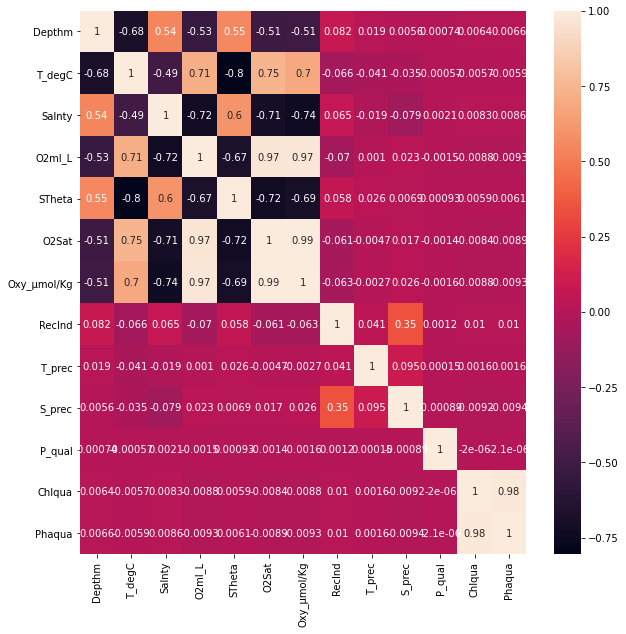

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

BottleCorrMatrix = bottle_df.corr()
print(BottleCorrMatrix)
plt.figure(figsize=(10,10))
sns.heatmap(BottleCorrMatrix, annot=True)
plt.show()

# Question 3.	Perform multiple linear regression on the dataset. Be sure to display the final resulting equation with the coefficients and intercept in markdown. 

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#select the columns that you want to include in X that were selected from above
#X = bottle_df[['Salnty', 'Depthm', 'RecInd','T_prec', 'S_prec', 'P_qual', 'Chlqua', 'Phaqua']]
X = bottle_df[['Salnty','Depthm', 'S_prec', 'T_prec']]
y= bottle_df['T_degC']

#split the data into a training and testing set
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)

reg = LinearRegression()
#reg.fit(X_train, y_train)
reg.fit(X,y)

LinearRegression()

In [75]:
#y_pred = reg.predict(X_test)
#accuracy = reg.score(X_test, y_test)
y_pred = reg.predict(X)
accuracy = reg.score(X, y)

print(accuracy)

0.4843035237248289


In [76]:
#Get the coefficients for the equation.
reg.coef_

array([-1.67411794, -0.00775145, -0.41458628, -0.83014547])

The equation for this model is y=-1.674(X1)-0.00775(X2)-0.41458(X3)-0.8301(X4)  where y is the independent variable (T_degC) and X1 is 'Salnty', X2 is 'Depthm', X3 is 'S_prec', and X4 is 'T_prec'.

# Question 4.	Which regression approach had the “best” performance? Be sure to compare it to what you did last week.
 

In [77]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

r2_score(y, y_pred)

0.4843035237248289

In [78]:
mean_squared_error(y, y_pred)

9.16997632065307

The multiple linear regression had the best performance.  Last week, we did single variable linear regression using only salinity to try and predict temperature.  For that, we had an r-squared of 0.239 and a mean squared error of 0.76.  Doing the polynomial regression improved the r-squared value to 0.39.  The multiple linear regression resulted in an r-squared (or accuracy) value of 0.48 and a mean squared error of 9.169. 

# Question 5.	Work with the diabetes dataset to perform multiple logistic regression. Look at the documentation for logistic regression in statsmodel and/or sklearn and see if you can tune the model performance based on available parameters. Please note: data scientists need to constantly learn new approaches to optimizing models. This is one way of doing that. 

In [79]:
#Load the dataset
diabetes_df = pd.read_csv("../week_13/diabetes.csv")
diabetes_df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [115]:
from sklearn.linear_model import LogisticRegression
from patsy import dmatrices

#split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=45)

#Standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

y_train, X_train = dmatrices("Outcome ~ Insulin * BMI * Age * Glucose * DiabetesPedigreeFunction", diabetes_df, return_type = 'dataframe')
y_test, X_test = dmatrices("Outcome ~ Insulin * BMI * Age * Glucose * DiabetesPedigreeFunction", diabetes_df, return_type = 'dataframe')

log_reg = LogisticRegression(fit_intercept = False)
mdl = log_reg.fit(X_train, y_train)

y_pred = mdl.predict(X_test)

log_reg.coef_

array([[-9.65677927e-10, -2.79767504e-08, -2.19473032e-08,
        -7.66994284e-07, -2.42181342e-08, -6.44201247e-07,
        -5.11212766e-07, -1.86278266e-05, -5.85291985e-08,
        -6.29862842e-07, -8.31573783e-07, -5.55872501e-06,
        -1.14670189e-06, -4.80440067e-06, -5.17284726e-06,
         4.58278628e-07, -2.92806150e-10, -7.59105441e-09,
        -5.42478438e-09, -1.78996919e-07, -7.19597210e-09,
        -1.06973520e-07, -1.09798848e-07, -3.16024379e-06,
        -1.07280391e-08, -2.07925430e-08,  1.32411852e-07,
         4.39684214e-06, -1.51790751e-07,  3.99552805e-06,
         9.46290428e-06, -2.67728634e-07]])

In [116]:
# Use score method to get accuracy of model
score = mdl.score(X_test, y_test)
print(score)

0.7044270833333334


# Question 6.	What are the other ways to assess the performance of the model besides accuracy? What approach makes the most sense with the diabetes dataset? Why? 

In [117]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
#get the confusion matrix
conf_matrix = confusion_matrix(y, y_pred)

# Get the TN (true negatives), TP (true positives), FN (false negatives) and FP (false positives) from the matrix
TN = conf_matrix[0,0]
TP = conf_matrix[1,1]
FN = conf_matrix[1,0]
FP = conf_matrix[0,1]

# Calculate accuracy
accuracy = (TN+TP)/(TN+TP+FP+FN)
print("accuracy", accuracy)

# Calculate sensitivity
sensitivity = TP/(TP+FN)
print("sensitivity", sensitivity)

# Calculate specificity
specificity = TN/(TN+FP)
print("specificity", specificity)

#Calculate precision
precision = TP/(TP + FP)
print("precision", precision)


accuracy 0.7044270833333334
sensitivity 0.41044776119402987
specificity 0.862
precision 0.6145251396648045


Besides accuracy, you can assess model performance with sensitivity and specificity.  Sensitivity (or recall) is the percent of true positives out of all the people that do have diabetes.  Specificity is the percent of true negatives out of all the people that do not have diabetes.  For the diabetes dataset, you want to make sure that the people who do have diabetes are being diagnosed properly and in our case we want to find out what symptoms mean that a person does have diabetes, so sensitivity/recall is more important here. A doctor would definitely not want to miss a diagnosis of diabetes.   

# Question 7.	Is the KNN model or the multiple logistic regression model more performant for the diabetes dataset? How can you tell? 

In [105]:
#import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


In [106]:
X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

#split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=45)

#Standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

#set the KNeighborsClassifier as knn and assign the number of neighbors.  We did this before in class and found the best number of neighbors for highest accuracy. 
knn = KNeighborsClassifier(n_neighbors=14)

#fit the model to the training data
knn.fit(X_train,y_train)
#Predict the outcome for the test data
y_predicted = knn.predict(X_test)

In [107]:
#Score the test data
print(knn.score(X_test, y_test))

0.7057291666666666


In [108]:
diabetes_pred_df = pd.DataFrame(X_test, columns = diabetes_df.columns[0:8])
diabetes_pred_df['Predicted_Outcome']= y_predicted.tolist()
diabetes_pred_df['Actual_Outcome'] = y_test.tolist()

diabetes_pred_df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Predicted_Outcome,Actual_Outcome
379,-0.864263,0.450713,0.213528,1.774927,0.945476,0.677477,-0.214298,-0.811966,0,0
380,0.024693,0.243297,0.901596,-0.077674,1.471088,0.359173,-0.715342,-0.893269,0,0
381,-0.271626,0.243297,-0.359862,0.478106,0.236696,-0.844846,-0.751131,-0.486756,0,1
382,2.691563,0.954438,1.016274,0.972133,0.435791,1.120335,2.097066,0.407571,1,0
383,1.209969,-1.386400,-0.015828,1.157393,-0.288917,0.386852,0.698318,0.407571,0,0


In [112]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
knn_conf_matrix = confusion_matrix(y_test, y_predicted)

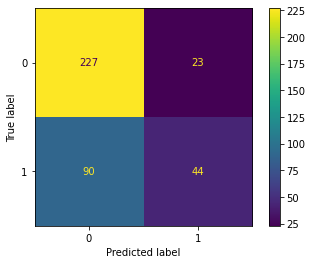

In [113]:
plot_confusion_matrix(knn, X_test, y_test)

In [114]:
# Get the TN (true negatives), TP (true positives), FN (false negatives) and FP (false positives) from the matrix
TN = knn_conf_matrix[0,0]
TP = knn_conf_matrix[1,1]
FN = knn_conf_matrix[1,0]
FP = knn_conf_matrix[0,1]

# Calculate accuracy
accuracy = (TN+TP)/(TN+TP+FP+FN)
print("accuracy", accuracy)

# Calculate sensitivity
sensitivity = TP/(TP+FN)
print("sensitivity", sensitivity)

# Calculate specificity
specificity = TN/(TN+FP)
print("specificity", specificity)

#Calculate precision
precision = TP/(TP + FP)
print("precision", precision)


accuracy 0.7057291666666666
sensitivity 0.3283582089552239
specificity 0.908
precision 0.6567164179104478


The accuracy score is 0.7057 using the k nearest neighbor model, but the sensitivity/recall is 0.328, and the specificity is 0.908. Sensitivity is low for KNN, which means that you are getting a lot of false negatives (or failing to predict when someone does have diabetes).  For logistic regression, the accuracy score is 0.7057 also, but the sensitivity is higher with 0.41, so this model does a better job of getting less false negatives (although it is still not very good). 